### Easy (6 Exercises)

1. **Load and Inspect Data**: Use pandas to load a given housing dataset and display the first five rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv(
    r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\sberbank_russian_housing_market\house-prices-advanced-regression-techniques\train.csv'
    )
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. **Plotting Relationships**: Create a scatter plot using matplotlib to visualize the relationship between 'SalePrice' and 'LotArea'.

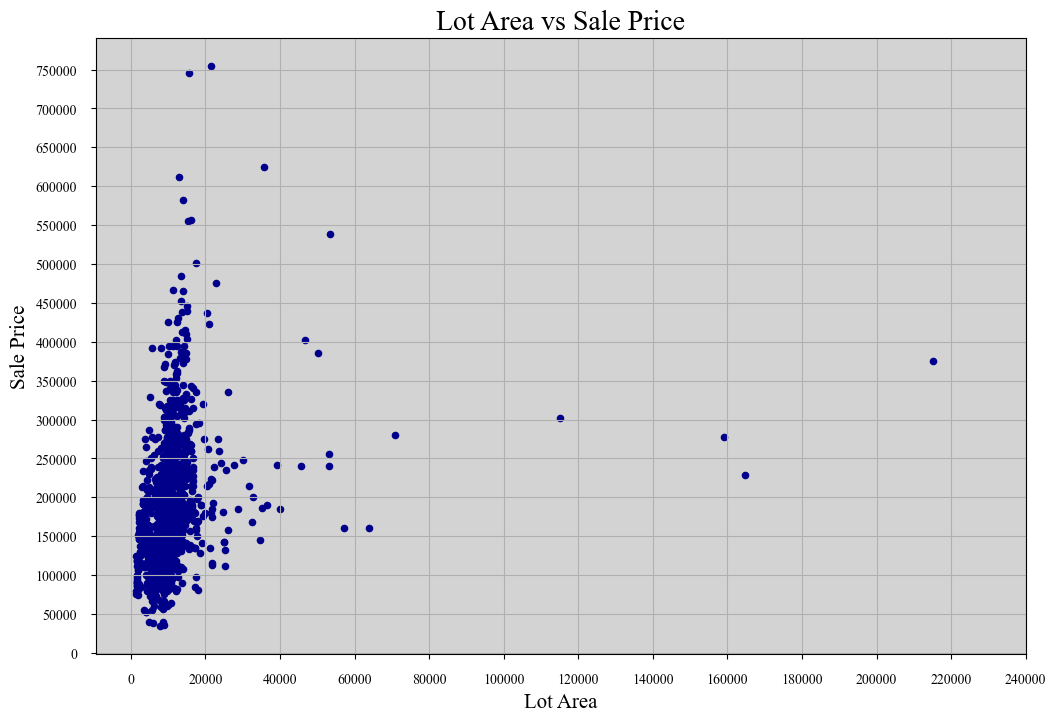

In [3]:
ax = df.plot.scatter(x='LotArea', y='SalePrice', c='DarkBlue', marker='o', figsize=(12, 8), title='LotArea vs SalePrice', grid=True)
ax.set_xticks(np.arange(0, 250000, 20000))
ax.set_yticks(np.arange(0, 800000, 50000))
ax.set_xlabel('Lot Area', fontsize=15, family='Times New Roman')
ax.set_ylabel('Sale Price', fontsize=15, family='Times New Roman')
ax.tick_params(axis='both', which='major', labelsize=10, pad=10, labelfontfamily='Times New Roman')
ax.set_title('Lot Area vs Sale Price', fontsize=20, family='Times New Roman')
ax.set_facecolor('lightgray')

3. **Basic Linear Regression**: Build a simple linear regression model with sklearn to predict 'SalePrice' from 'LotArea'.

In [4]:
# Split the data into training and test sets
train_df = df.sample(frac=2/3, random_state=0)
train_df_index = train_df.index
test_df = df[~df.index.isin(train_df_index)]

# Confirm that the training and test sets are mutually exclusive
test_df.index.isin(train_df_index).sum()

0

In [5]:
train_df.shape, test_df.shape

((973, 81), (487, 81))

In [6]:
one_var_model = LinearRegression()
one_var_model.fit(train_df[['LotArea']], train_df[['SalePrice']])

LinearRegression()

4. **Model Coefficients**: Extract and display the coefficients (slope, intercept) of the trained linear regression model.

In [7]:
print('Intercept: ', one_var_model.intercept_[0])
print('Coefficient: ', one_var_model.coef_[0][0])

Intercept:  157571.5518944924
Coefficient:  2.3114009788170864


5. **Basic Prediction**: Predict 'SalePrice' for a new 'LotArea' value using the trained model.

In [8]:
test_df['predicted_sale_price'] = one_var_model.predict(test_df[['LotArea']])
train_df['predicted_sale_price'] = one_var_model.predict(train_df[['LotArea']])

test_df[['LotArea', 'SalePrice','predicted_sale_price']].head()

C:\Users\jorda\AppData\Local\Temp\ipykernel_14488\3957387369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predicted_sale_price'] = one_var_model.predict(test_df[['LotArea']])


,LotArea,SalePrice,predicted_sale_price
0,8450,208500,177102.890165
3,9550,140000,179645.431242
7,10382,200000,181568.516857
11,11924,345000,185132.697166
22,9742,230000,180089.220230


6. **Basic Data Split**: Split the dataset into training and testing sets with a 70-30 ratio using `train_test_split`.

In [9]:
train_df, test_df = train_test_split(df, test_size=0.3, train_size=0.7, random_state=47)
print(f"Train data size: {train_df.shape[0]}\nTest data size: {test_df.shape[0]}")

Train data size: 1021
Test data size: 438


### Medium (8 Exercises)

7. **Residual Calculation**: Calculate the residuals for a small set of predictions from the linear model.

In [10]:
one_var_model = LinearRegression()
one_var_model.fit(train_df[['LotArea']], train_df[['SalePrice']])

train_df['predicted_sale_price'] = one_var_model.predict(train_df[['LotArea']])
test_df['predicted_sale_price'] = one_var_model.predict(test_df[['LotArea']])


In [11]:
test_df_sample = test_df.sample(10, random_state=47)
test_df_sample['residual'] = test_df_sample['SalePrice'] - test_df_sample['predicted_sale_price']
test_df_sample[['LotArea', 'SalePrice', 'predicted_sale_price', 'residual']]

,LotArea,SalePrice,predicted_sale_price,residual
339,12400,155000,188058.633705,-33058.633705
429,11457,175000,185201.870113,-10201.870113
78,10778,136500,183144.879149,-46644.879149
130,14200,226000,193511.628896,32488.371104
141,11645,260000,185771.405166,74228.594834
1333,7200,125500,172305.536486,-46805.536486
782,16285,187100,199828.014992,-12728.014992
274,8314,124500,175680.334621,-51180.334621
1090,8544,92900,176377.106229,-83477.106229
25,14230,256300,193602.512149,62697.487851


8. **Simple Model Evaluation**: Compute the R-squared score for the simple linear regression model on the test set.

In [12]:
R2_score = 1 - (
    np.sum(
        (
            test_df['SalePrice'] - test_df['predicted_sale_price']
            ) ** 2
        ) / np.sum(
            (
                test_df['SalePrice'] - test_df['SalePrice'].mean()
                ) ** 2
            )
    )
R2_score

-0.024293233075868503

In [13]:
from sklearn.metrics import r2_score

r2_score_sk = r2_score(test_df['SalePrice'], test_df['predicted_sale_price'])
r2_score_sk

-0.024293233075868503

9. **Visualize Regression Line**: Plot the regression line for 'SalePrice' against 'LotArea' using seaborn.

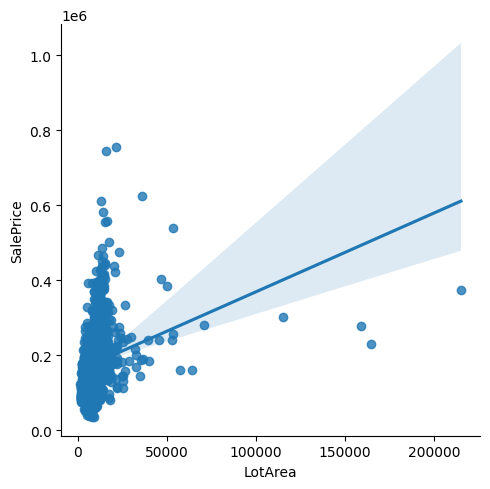

In [14]:
import seaborn as sns

sns.set_style()
colors = sns.diverging_palette(10, 240, n=9)

ax = sns.lmplot(data=df, x='LotArea', y='SalePrice', palette=colors)


10. **Simple Residuals Plotting**: Create a plot showing residuals versus fitted values for the linear regression model.

In [15]:
test_df['residual'] = test_df['SalePrice'] - test_df['predicted_sale_price']
test_df[['SalePrice', 'residual']].head()

,SalePrice,residual
903,240000,44491.968976
1454,185000,11785.630982
629,168500,-9319.120513
496,430000,241056.769298
1367,127000,-31567.018047


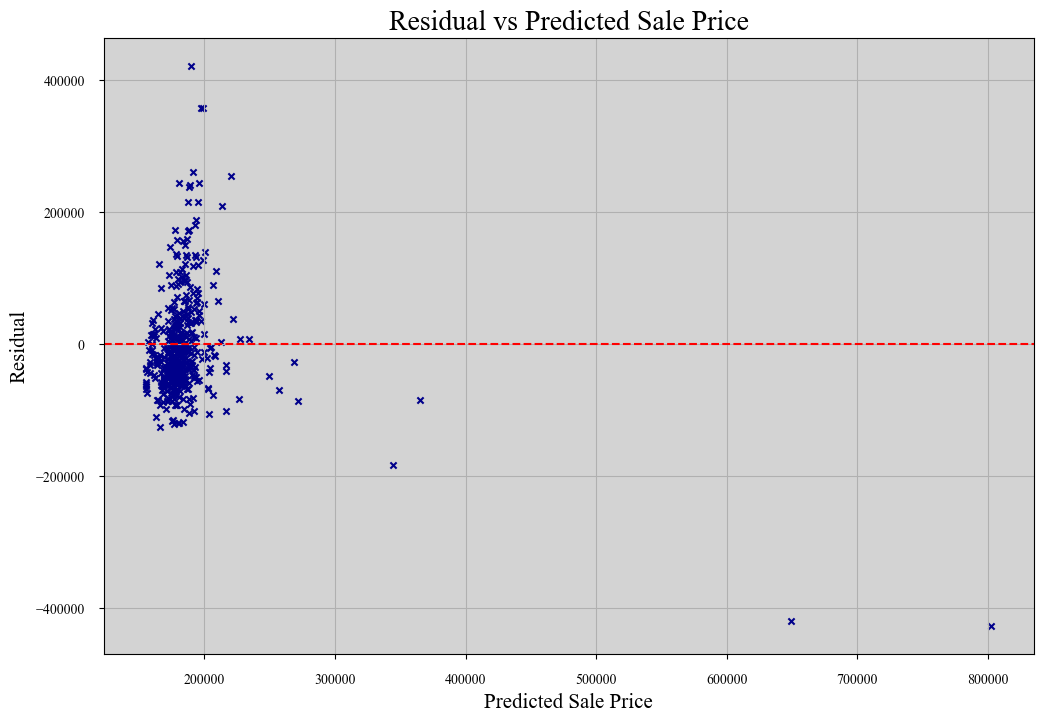

In [16]:
ax_res_vs_pred = test_df.plot.scatter(x='predicted_sale_price', y='residual', figsize=(12, 8), grid=True, marker='x', color='DarkBlue')
ax_res_vs_pred.set_xlabel('Predicted Sale Price', fontsize=15, family='Times New Roman')
ax_res_vs_pred.set_ylabel('Residual', fontsize=15, family='Times New Roman')
ax_res_vs_pred.tick_params(axis='both', which='major', labelsize=10, pad=10, labelfontfamily='Times New Roman')
ax_res_vs_pred.set_title('Residual vs Predicted Sale Price', fontsize=20, family='Times New Roman')
ax_res_vs_pred.set_facecolor('lightgray')
ax_res_vs_pred.axhline(y=0, color='red', linestyle='--')

11. **Multiple Linear Regression**: Extend to multiple linear regression using two predictor variables (e.g., 'LotArea' and 'OverallQual') to predict 'SalePrice'.

In [17]:
two_var_model = LinearRegression()
two_var_model.fit(train_df[['LotArea', 'OverallQual']], train_df[['SalePrice']])

intercept = two_var_model.intercept_[0]
coefficients = two_var_model.coef_[0]

print('Intercept: ', intercept)
print('Coefficient a: ', coefficients[0])
print('Coefficient b: ', coefficients[1])

train_df['predicted_sale_price'] = two_var_model.predict(train_df[['LotArea', 'OverallQual']])
test_df['predicted_sale_price'] = two_var_model.predict(test_df[['LotArea', 'OverallQual']])

Train_R2_score = r2_score(train_df['SalePrice'], train_df['predicted_sale_price'])
Test_R2_score = r2_score(test_df['SalePrice'], test_df['predicted_sale_price'])
print('Train R2 score: ', Train_R2_score)
print('Test R2 score: ', R2_score)

Intercept:  -115063.64773118007
Coefficient a:  2.2448537139071343
Coefficient b:  44733.46736766549
Train R2 score:  0.6816324797588892
Test R2 score:  -0.024293233075868503


12. **Cross-Validation**: Implement 5-fold cross-validation on the linear regression model and calculate the average R-squared score.

In [30]:
from sklearn.model_selection import cross_validate, cross_val_score

cv_train_df, cv_test_df = train_test_split(df, test_size=0.3, train_size=0.7, random_state=47)

# Cross validation with two variables
cv_two_var_model = LinearRegression()
cv_two_var_model.fit(cv_train_df[['LotArea', 'OverallQual']], cv_train_df[['SalePrice']])

two_var_R2_scores = cross_val_score(cv_two_var_model, X=cv_train_df[['LotArea', 'OverallQual']], y=cv_train_df[['SalePrice']], cv=5, scoring='r2')

# Average R2 score with two variables
two_var_average_score = two_var_R2_scores.mean()

print('Average R2 score: ', two_var_average_score)

Average R2 score:  0.6237369489085609


13. **Interpreting Coefficients**: Interpret the coefficients of the multiple linear regression model and their impact on 'SalePrice'.

In [32]:
cv_2v_scores = cross_validate(cv_two_var_model, X=cv_train_df[['LotArea', 'OverallQual']], y=cv_train_df[['SalePrice']], cv=5, return_estimator=True)

def interpret_2v_cv(cv_scores):
    for i, model in enumerate(cv_scores['estimator']):
        print(f"Model: {i+1}, Intercept: {model.intercept_[0]}, Coefficient A: {model.coef_[0][0]}, Coefficient B: {model.coef_[0][1]}")

interpret_2v_cv(cv_2v_scores)

Model: 1, Intercept: -115747.249842358, Coefficient A: 2.1861158546001036, Coefficient B: 45081.63494940213
Model: 2, Intercept: -123783.45048887367, Coefficient A: 4.234556448197296, Coefficient B: 42883.23067928785
Model: 3, Intercept: -121797.85206395795, Coefficient A: 2.0927495173615314, Coefficient B: 46166.92512096039
Model: 4, Intercept: -112924.86691476637, Coefficient A: 1.8522373716193137, Coefficient B: 44970.79349258512
Model: 5, Intercept: -108105.46202869192, Coefficient A: 2.068407750760095, Coefficient B: 43816.263704720564


14. **Prediction with Multiple Regression**: Use the multiple regression model to predict 'SalePrice' for a new set of predictor values.

In [33]:
cv_test_df['predicted_sale_price'] = cv_two_var_model.predict(cv_test_df[['LotArea', 'OverallQual']])

Test_R2_score = r2_score(cv_test_df['SalePrice'], cv_test_df['predicted_sale_price'])

print('Test R2 score after 5-fold cross-validation: ', Test_R2_score)

Test R2 score after 5-fold cross-validation:  0.5729465465339784


### Hard (6 Exercises)

15. **Error Analysis**: Analyze the residuals of the multiple regression model to identify any patterns.

In [35]:
cv_test_df['residual'] = cv_test_df['SalePrice'] - cv_test_df['predicted_sale_price']
cv_test_df[['SalePrice', 'residual']].head()

,SalePrice,residual
903,240000,8573.094823
1454,185000,-29907.026697
629,168500,-5085.736974
496,430000,158704.225453
1367,127000,12413.775745


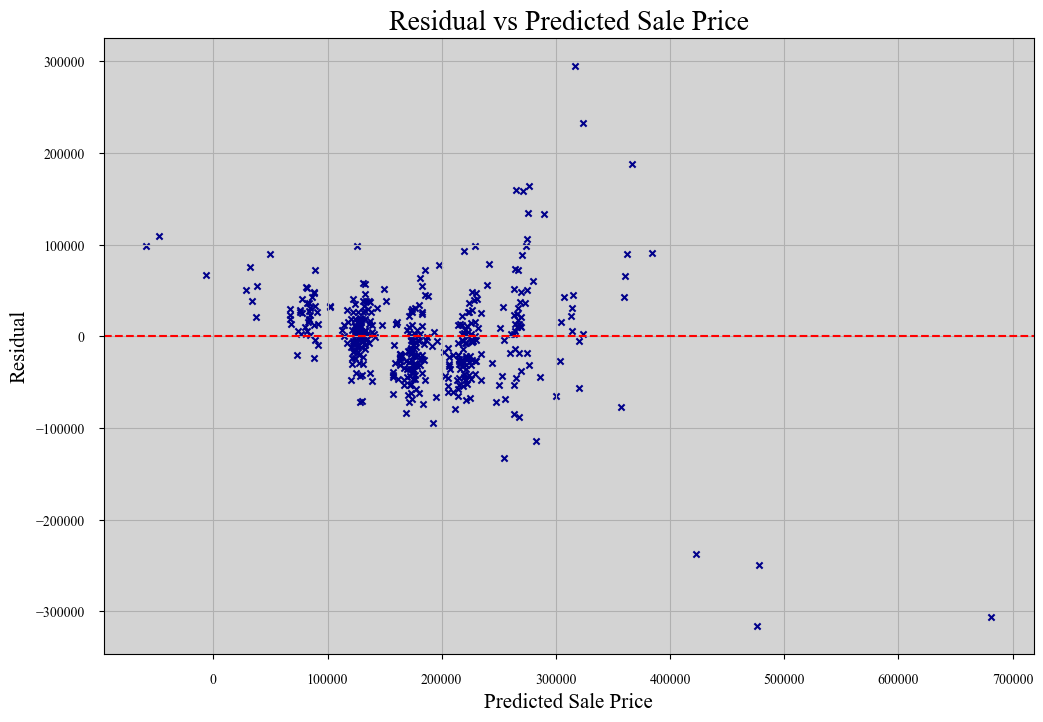

In [36]:
ax_res_vs_pred_cv = cv_test_df.plot.scatter(x='predicted_sale_price', y='residual', figsize=(12, 8), grid=True, marker='x', color='DarkBlue')
ax_res_vs_pred_cv.set_xlabel('Predicted Sale Price', fontsize=15, family='Times New Roman')
ax_res_vs_pred_cv.set_ylabel('Residual', fontsize=15, family='Times New Roman')
ax_res_vs_pred_cv.tick_params(axis='both', which='major', labelsize=10, pad=10, labelfontfamily='Times New Roman')
ax_res_vs_pred_cv.set_title('Residual vs Predicted Sale Price', fontsize=20, family='Times New Roman')
ax_res_vs_pred_cv.set_facecolor('lightgray')
ax_res_vs_pred_cv.axhline(y=0, color='red', linestyle='--')

Another option 

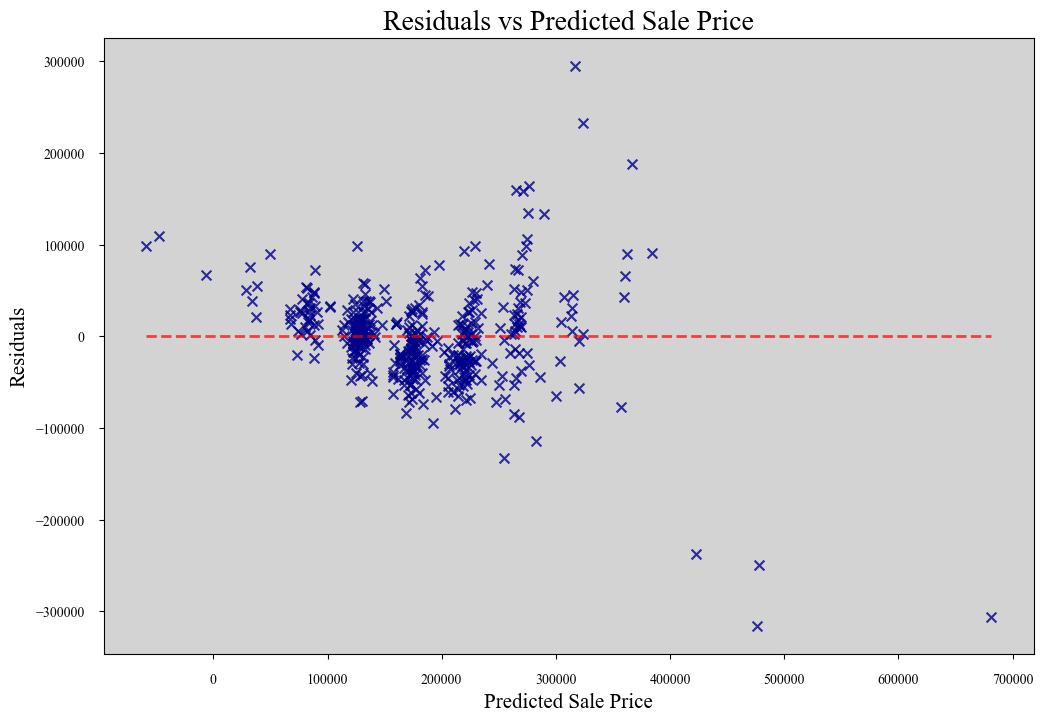

In [80]:
from sklearn.metrics import PredictionErrorDisplay

display = PredictionErrorDisplay.from_estimator(
    estimator=cv_two_var_model, 
    X=cv_test_df[['LotArea', 'OverallQual']], 
    y=cv_test_df[['SalePrice']], 
    scatter_kwargs={'color': 'DarkBlue', 'marker': 'x', 's': 50}, 
    line_kwargs={'color': 'red', 'linewidth': 2}
    )
display.ax_.set_xlabel('Predicted Sale Price', fontsize=15, family='Times New Roman')
display.ax_.set_ylabel('Residuals', fontsize=15, family='Times New Roman')
display.ax_.tick_params(axis='both', which='major', labelsize=10, pad=10, labelfontfamily='Times New Roman')
display.ax_.set_title('Residuals vs Predicted Sale Price', fontsize=20, family='Times New Roman')
display.ax_.set_facecolor('lightgray')
display.figure_.set_size_inches(12, 8)

16. **Impact of Feature Removal**: Observe the effect on model performance when excluding a feature from the multiple regression model.

In [92]:
# Cross validation with one variable
cv_one_var_model = LinearRegression()
cv_one_var_model.fit(cv_train_df[['LotArea']], cv_train_df[['SalePrice']])

one_var_R2_scores = cross_val_score(cv_one_var_model, cv_train_df[['LotArea']], cv_train_df[['SalePrice']], cv=5, scoring='r2')

# Average R2 score for one variable model
one_var_average_score = one_var_R2_scores.mean()

print('Average R2 score: ', one_var_average_score)

Average R2 score:  -0.035635367244395796


In [93]:
cv_1v_scores = cross_validate(cv_two_var_model, X=cv_train_df[['LotArea']], y=cv_train_df[['SalePrice']], cv=5, return_estimator=True)

def interpret_1v_cv(cv_scores):
    for i, model in enumerate(cv_scores['estimator']):
        print(f"Model: {i+1}, Intercept: {model.intercept_[0]}, Coefficient: {model.coef_[0][0]}")
        
interpret_1v_cv(cv_1v_scores)

Model: 1, Intercept: 151440.99672913004, Coefficient: 2.9599199387301587
Model: 2, Intercept: 121361.00685391005, Coefficient: 5.962416278583218
Model: 3, Intercept: 153784.86264894437, Coefficient: 2.9268858390774963
Model: 4, Intercept: 156366.0956149018, Coefficient: 2.3637900175551656
Model: 5, Intercept: 152651.17984900574, Coefficient: 2.700637766555935


In [94]:
cv_test_df['predicted_sale_price'] = cv_one_var_model.predict(cv_test_df[['LotArea']])

Test_R2_score_1v = r2_score(cv_test_df['SalePrice'], cv_test_df['predicted_sale_price'])

print('Test R2 score after 5-fold cross-validation: ', Test_R2_score_1v)

Test R2 score after 5-fold cross-validation:  -0.024293233075868503


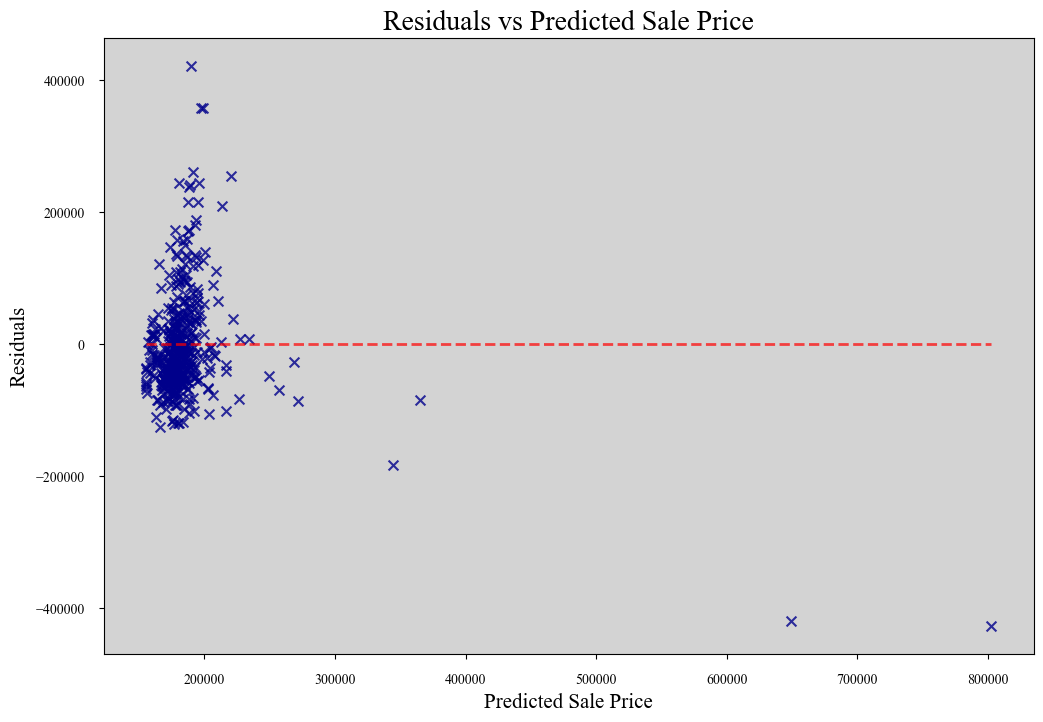

In [95]:
display2 = PredictionErrorDisplay.from_estimator(
    estimator=cv_one_var_model, 
    X=cv_test_df[['LotArea']], 
    y=cv_test_df[['SalePrice']], 
    scatter_kwargs={'color': 'DarkBlue', 'marker': 'x', 's': 50}, 
    line_kwargs={'color': 'red', 'linewidth': 2}
    )
display2.ax_.set_xlabel('Predicted Sale Price', fontsize=15, family='Times New Roman')
display2.ax_.set_ylabel('Residuals', fontsize=15, family='Times New Roman')
display2.ax_.tick_params(axis='both', which='major', labelsize=10, pad=10, labelfontfamily='Times New Roman')
display2.ax_.set_title('Residuals vs Predicted Sale Price', fontsize=20, family='Times New Roman')
display2.ax_.set_facecolor('lightgray')
display2.figure_.set_size_inches(12, 8)

17. **Exploring Correlation**: Examine the correlation between 'SalePrice' and various other variables in the dataset.

18. **Advanced Visualization**: Create a seaborn pair plot for a subset of variables in the housing dataset to explore relationships.

19. **Model Comparison**: Compare the performance of simple and multiple linear regression models based on their R-squared scores.

20. **Feature Importance Observation**: Observe which features seem to have the most significant impact on 'SalePrice' based on the coefficients in the multiple regression model.